In [1]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import pandas as pd # data processing

In [3]:
import os
#Library for downloading images
import cv2
#for training and testing
from sklearn.model_selection import train_test_split

In [9]:
# The dataset path
dataset_path = "/content/drive/MyDrive/Flowers_102_Image_Dataset/organized_classes"
classes = ["frangipani", "rose", "water_lily", "watercress", "wallflower"]

X, y = [], []

for idx, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    print(f"Processing class: {class_name}")
    if os.path.exists(class_folder):
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            try:
                # قراءة الصورة
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Failed to load {img_name}, skipping...")
                    continue
                img = cv2.resize(img, (128, 128))
                X.append(img)
                y.append(idx)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    else:
        print(f"Folder does not exist: {class_folder}")

X = np.array(X)
y = np.array(y)
print(f"Finished processing: {len(X)} images loaded successfully.")


Processing class: frangipani
Processing class: rose
Processing class: water_lily
Processing class: watercress
Processing class: wallflower
Finished processing: 911 images loaded successfully.


In [10]:
print(X.shape)

(911, 128, 128, 3)


In [15]:
X = X.reshape(X.shape[0], -1)
print(X.shape)

(911, 49152)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
X_train.shape, X_test.shape

((728, 49152), (183, 49152))

In [21]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
classifer_images = LogisticRegression(random_state=0)
classifer_images.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred_test = classifer_images.predict(X_test)
y_pred_test

array([2, 3, 1, 4, 2, 1, 2, 3, 0, 0, 1, 0, 2, 2, 3, 0, 1, 1, 1, 1, 3, 0,
       4, 0, 3, 4, 0, 4, 0, 4, 2, 0, 4, 2, 4, 3, 2, 0, 2, 4, 3, 2, 4, 1,
       0, 1, 2, 0, 1, 1, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3, 2, 1, 0,
       3, 0, 3, 3, 3, 2, 3, 0, 4, 2, 0, 3, 4, 0, 3, 3, 3, 3, 4, 4, 4, 2,
       2, 2, 0, 0, 3, 3, 4, 3, 2, 0, 4, 0, 3, 2, 2, 3, 4, 4, 2, 1, 4, 2,
       3, 4, 3, 3, 3, 3, 1, 4, 4, 1, 0, 2, 2, 4, 0, 2, 2, 4, 1, 3, 0, 3,
       4, 2, 3, 4, 4, 0, 4, 1, 3, 1, 1, 3, 2, 3, 2, 1, 1, 2, 4, 0, 2, 1,
       4, 3, 0, 0, 3, 3, 4, 1, 3, 3, 4, 4, 0, 2, 1, 2, 1, 0, 1, 3, 4, 3,
       4, 4, 1, 4, 0, 1, 2])

In [25]:
classifer_images.predict_proba(X_test)[:,0]

array([5.66109763e-06, 2.53881375e-07, 2.91237841e-09, 3.92373498e-06,
       4.43167977e-01, 8.73134905e-03, 3.83869009e-03, 3.75561742e-13,
       8.24794010e-01, 9.77431693e-01, 2.83878438e-05, 9.99898916e-01,
       1.72361089e-09, 1.12514808e-02, 1.21514067e-07, 5.66721060e-01,
       1.17184900e-09, 2.02523398e-10, 1.00106919e-06, 4.37133151e-03,
       2.18892661e-13, 9.99766923e-01, 2.11541768e-08, 8.08982200e-01,
       1.92399272e-08, 4.55408743e-12, 9.99576471e-01, 3.78668962e-06,
       9.99792871e-01, 4.07387601e-10, 7.85371076e-05, 7.84866208e-01,
       1.13594798e-07, 6.18173052e-09, 5.34216043e-05, 6.22161891e-04,
       1.31548160e-02, 9.91066194e-01, 6.64383234e-03, 2.04619751e-06,
       9.04463205e-06, 9.08767011e-08, 2.24984028e-06, 7.77747586e-11,
       8.71692555e-01, 4.00572734e-04, 2.58126474e-05, 3.76393309e-01,
       2.17846981e-07, 1.79270277e-07, 4.84939678e-01, 8.81438042e-14,
       4.18626042e-14, 4.32688174e-03, 4.03067347e-11, 4.21626146e-03,
      

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy score of Logistic Regression : {0:0.2f}'.format(accuracy_score(y_test, y_pred_test)))

Accuracy score of Logistic Regression : 0.65


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22  2  2  0  0]
 [ 4 14  6  6  3]
 [ 4  9 29  1  1]
 [ 1  0  0 30  9]
 [ 1  3  3  9 24]]

True Positives(TP) =  22

True Negatives(TN) =  14

False Positives(FP) =  2

False Negatives(FN) =  4


<Axes: >

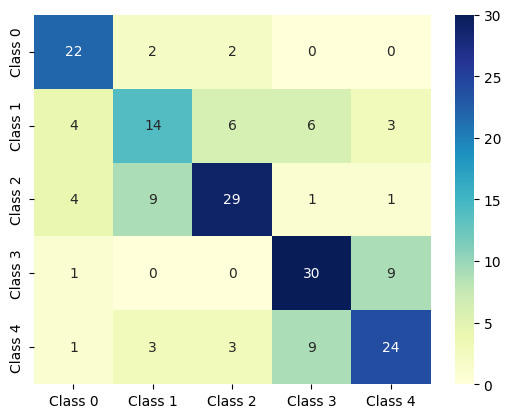

In [34]:
#visualing the confusion matrix
num_classes = len(np.unique(y_test))

# Create class labels dynamically
class_labels = [f"Class {i}" for i in range(num_classes)]

# Create the DataFrame with appropriate labels
cm_matrix = pd.DataFrame(data=cm,
                         columns=class_labels,
                         index=class_labels)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.50      0.42      0.46        33
           2       0.72      0.66      0.69        44
           3       0.65      0.75      0.70        40
           4       0.65      0.60      0.62        40

    accuracy                           0.65       183
   macro avg       0.64      0.66      0.65       183
weighted avg       0.65      0.65      0.65       183



In [40]:
#True Positives (TP): The number of data points correctly predicted as positive (class 1).
#True Negatives (TN): The number of data points correctly predicted as negative (class 0).
#False Positives (FP): The number of data points incorrectly predicted as positive (false alarms).
#False Negatives (FN): The number of data points incorrectly predicted as negative (misses).
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [41]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9167


In [42]:
recall = TP / float(TP + FN)
print('Recall : {0:0.4f}'.format(recall))

Recall : 0.8462


In [48]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

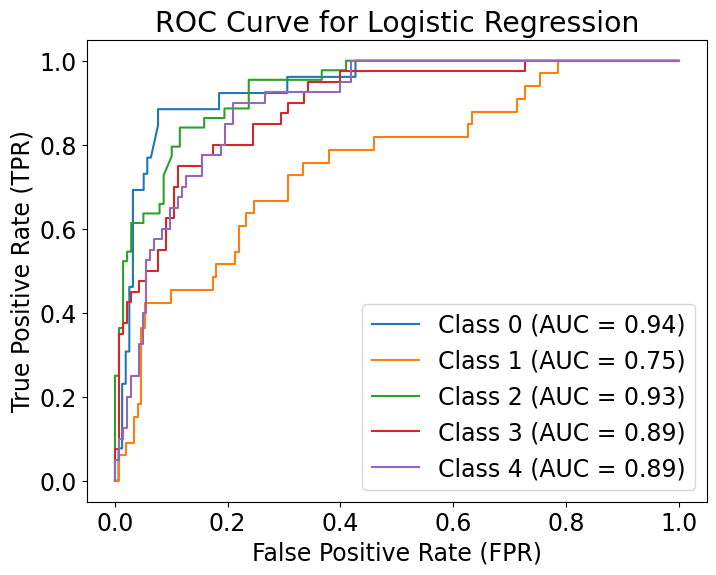

Overall AUC (macro-average): 0.88
Loss: 0.0


In [50]:
y_prob_log = classifer_images.predict_proba(X_test)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
plt.figure(figsize=(8, 6))
for i in range(len(classifer_images.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_log[:, i])
    auc_value = roc_auc_score(y_test_bin[:, i], y_prob_log[:, i])
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {auc_value:.2f})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

auc_value_overall = roc_auc_score(y_test_bin, y_prob_log, multi_class='ovr', average='macro')
print(f"Overall AUC (macro-average): {auc_value_overall:.2f}")
loss = log_loss(y_test, y_prob_log, labels=classes)
print("Loss:", loss)